# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [136]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [71]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [75]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Substituindo dados faltantes em 'total_bedrooms' pela mediana 

In [78]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

Transformar a coluna categorica 'ocean_proximity' em colunas de valores binarios indicando cada localização 

In [81]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [87]:


categorias = df['ocean_proximity'].unique()

for category in categorias:
    df[f'proximity_{category}'] = (df['ocean_proximity'] == category).astype(int)

df_scikit = df.drop(columns=['ocean_proximity'])

df_scikit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   longitude             20640 non-null  float64
 1   latitude              20640 non-null  float64
 2   housing_median_age    20640 non-null  float64
 3   total_rooms           20640 non-null  float64
 4   total_bedrooms        20640 non-null  float64
 5   population            20640 non-null  float64
 6   households            20640 non-null  float64
 7   median_income         20640 non-null  float64
 8   median_house_value    20640 non-null  float64
 9   proximity_NEAR BAY    20640 non-null  int32  
 10  proximity_<1H OCEAN   20640 non-null  int32  
 11  proximity_INLAND      20640 non-null  int32  
 12  proximity_NEAR OCEAN  20640 non-null  int32  
 13  proximity_ISLAND      20640 non-null  int32  
dtypes: float64(9), int32(5)
memory usage: 1.8 MB


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

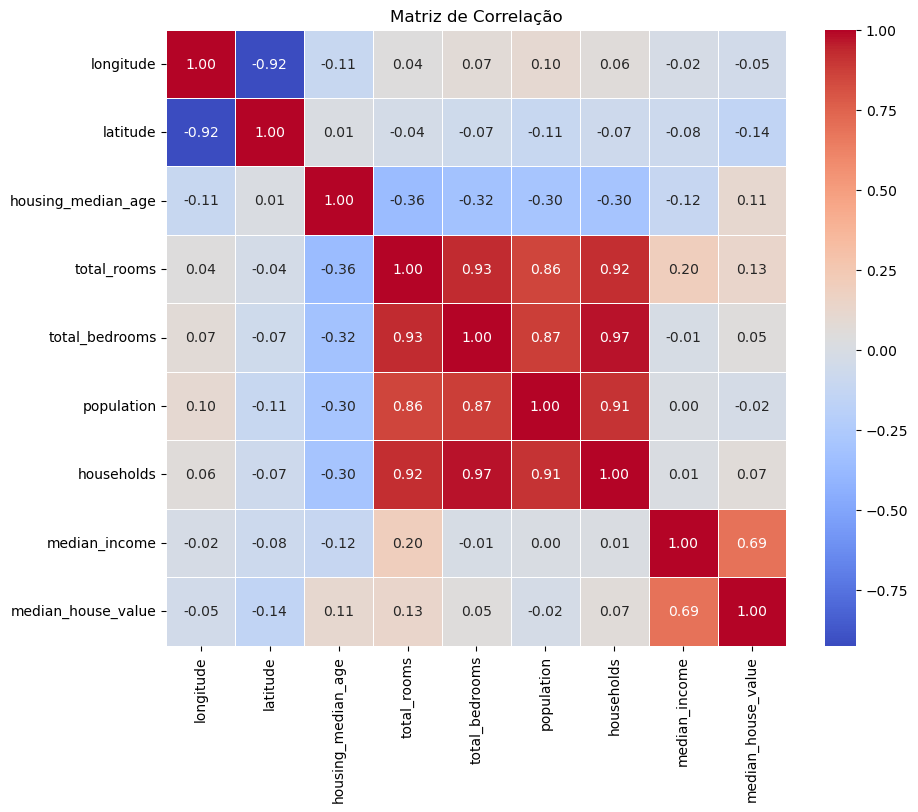

In [93]:
plt.figure(figsize = (10, 8))
sns.heatmap(df_scikit.select_dtypes(include=['int64', 'float64']).corr(), annot = True, cmap = 'coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

A variavel com maior correlação a  'median_house_value' é a 'median_income', e a segunda maior 'total_rooms', essas duas variaveis possivelmente possuem maior potencial preditivo dentre as outras

### 3. Separe os dados em validação e teste

In [95]:
X = df_scikit.drop(columns = ['median_house_value'])
y = df_scikit['median_house_value']

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=100)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

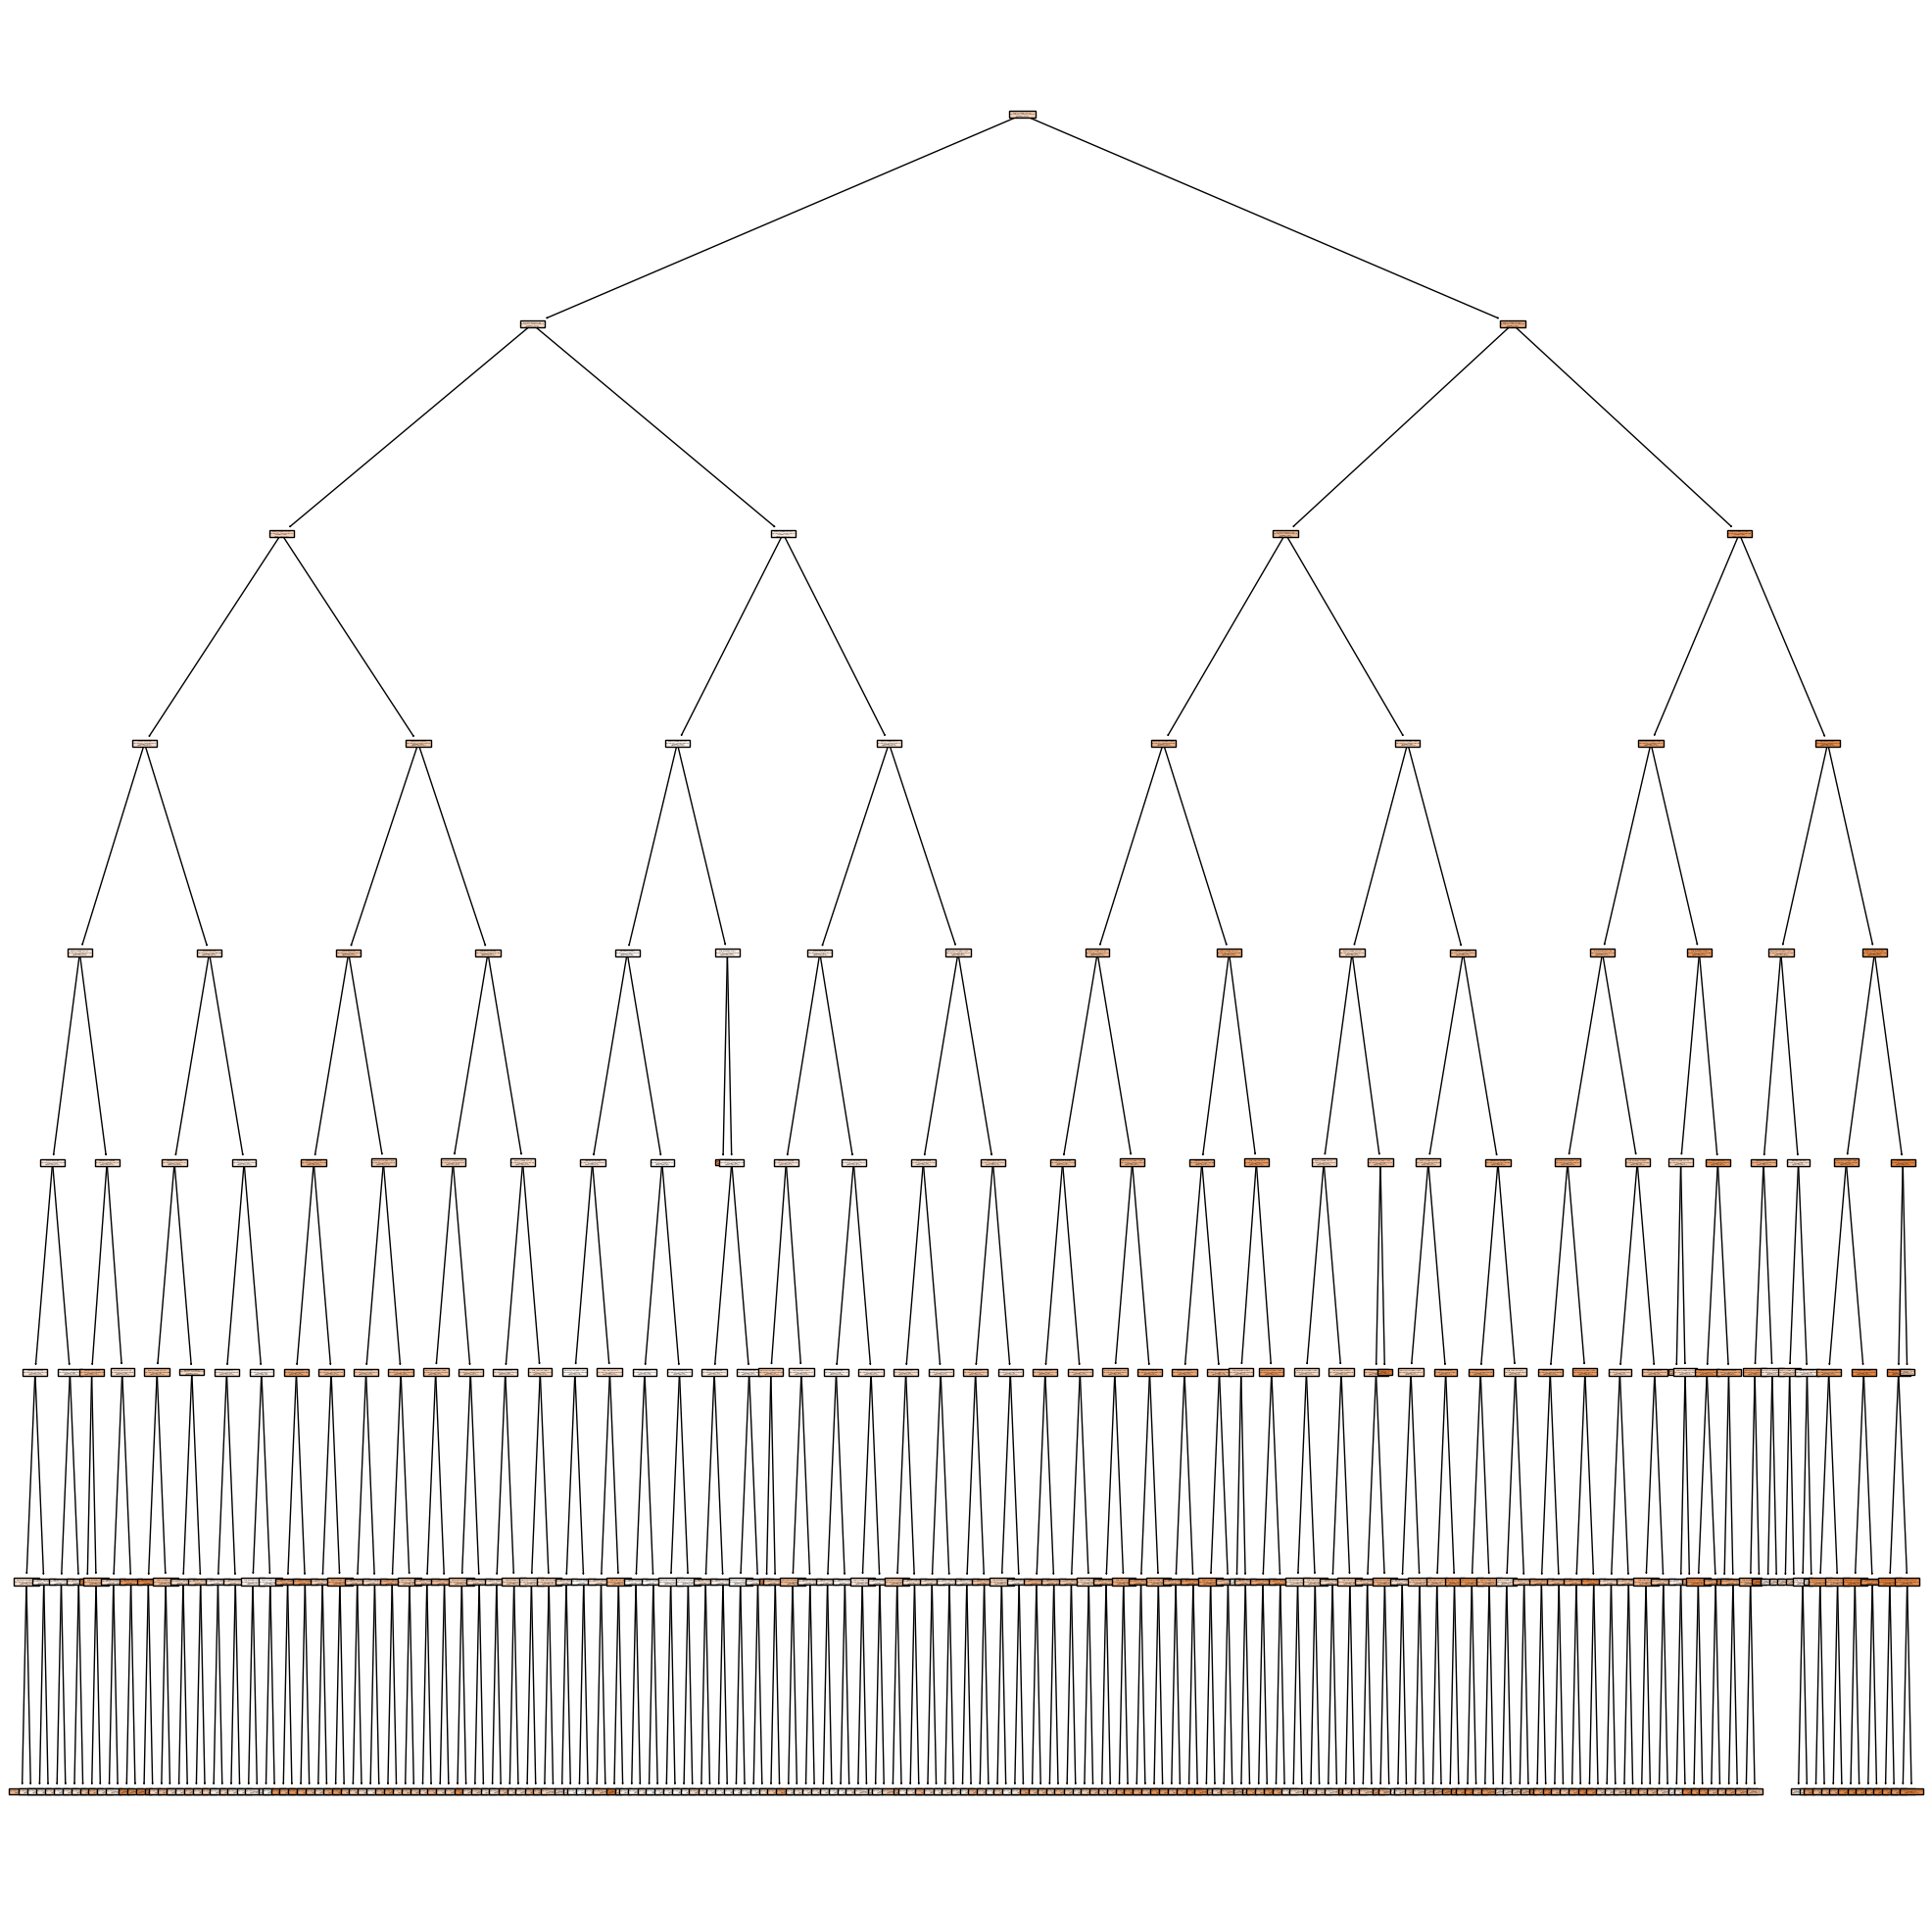

In [111]:
clf_oito = DecisionTreeRegressor( max_depth = 8, random_state = 123)
clf_oito.fit(X_treino, y_treino)

plt.figure(figsize=(25, 25))
plot_tree(clf_oito, filled = True, feature_names = X.columns)
plt.show()

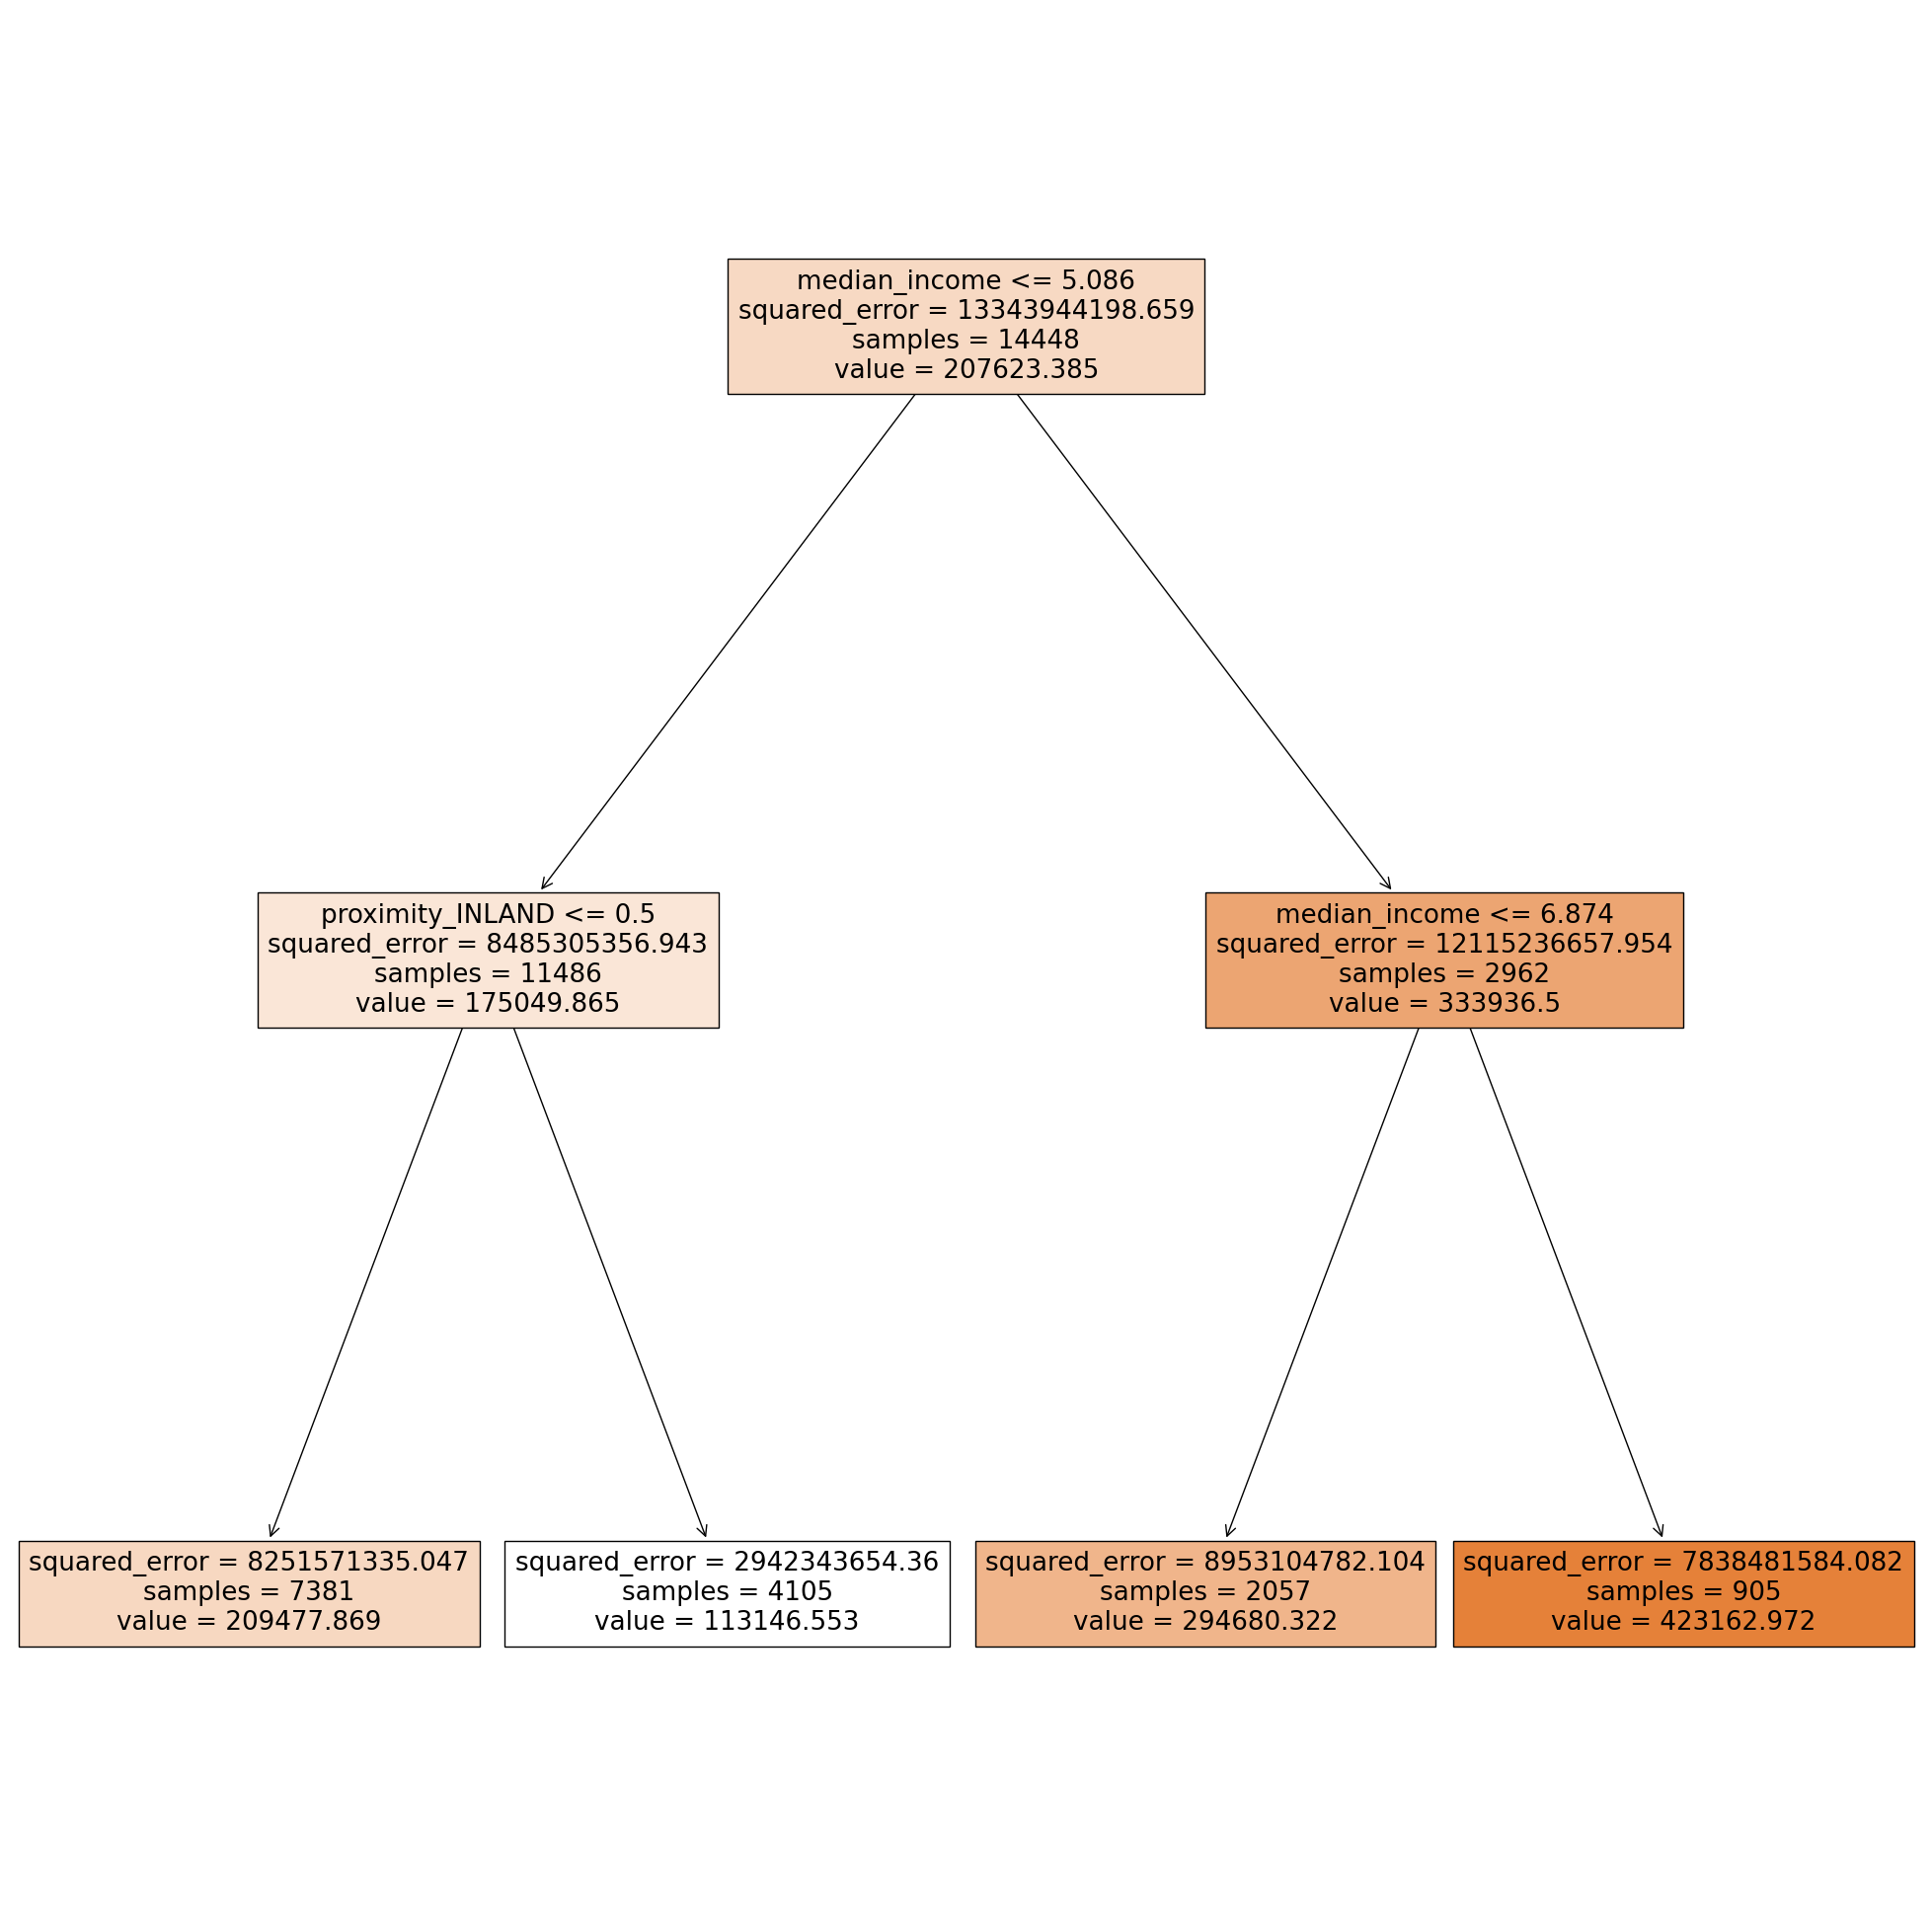

In [113]:
clf_dois = DecisionTreeRegressor(max_depth = 2, random_state = 123)
clf_dois.fit(X_treino, y_treino)

plt.figure(figsize=(25, 25))
plot_tree(clf_dois, filled = True, feature_names = X.columns)
plt.show()

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [123]:
y_pred_oito = clf_oito.predict(X_teste)
print('MSE da arvore com profundidade 8:', mean_squared_error(y_teste, y_pred_oito))

MSE da arvore com profundidade 8: 3753179950.2064915


In [125]:
y_pred_dois = clf_dois.predict(X_teste)
print('MSE da arvore com profundidade 2:', mean_squared_error(y_teste, y_pred_dois))

MSE da arvore com profundidade 2: 6578281582.876222


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

Enquanto as duas arvores de regressão apresentao um erro quadratico muito grande, a arvore com profundidade 8 possui um erro menor, sendo assim a mais adequada das duas, ainda que haja a possibilidade de melhora.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

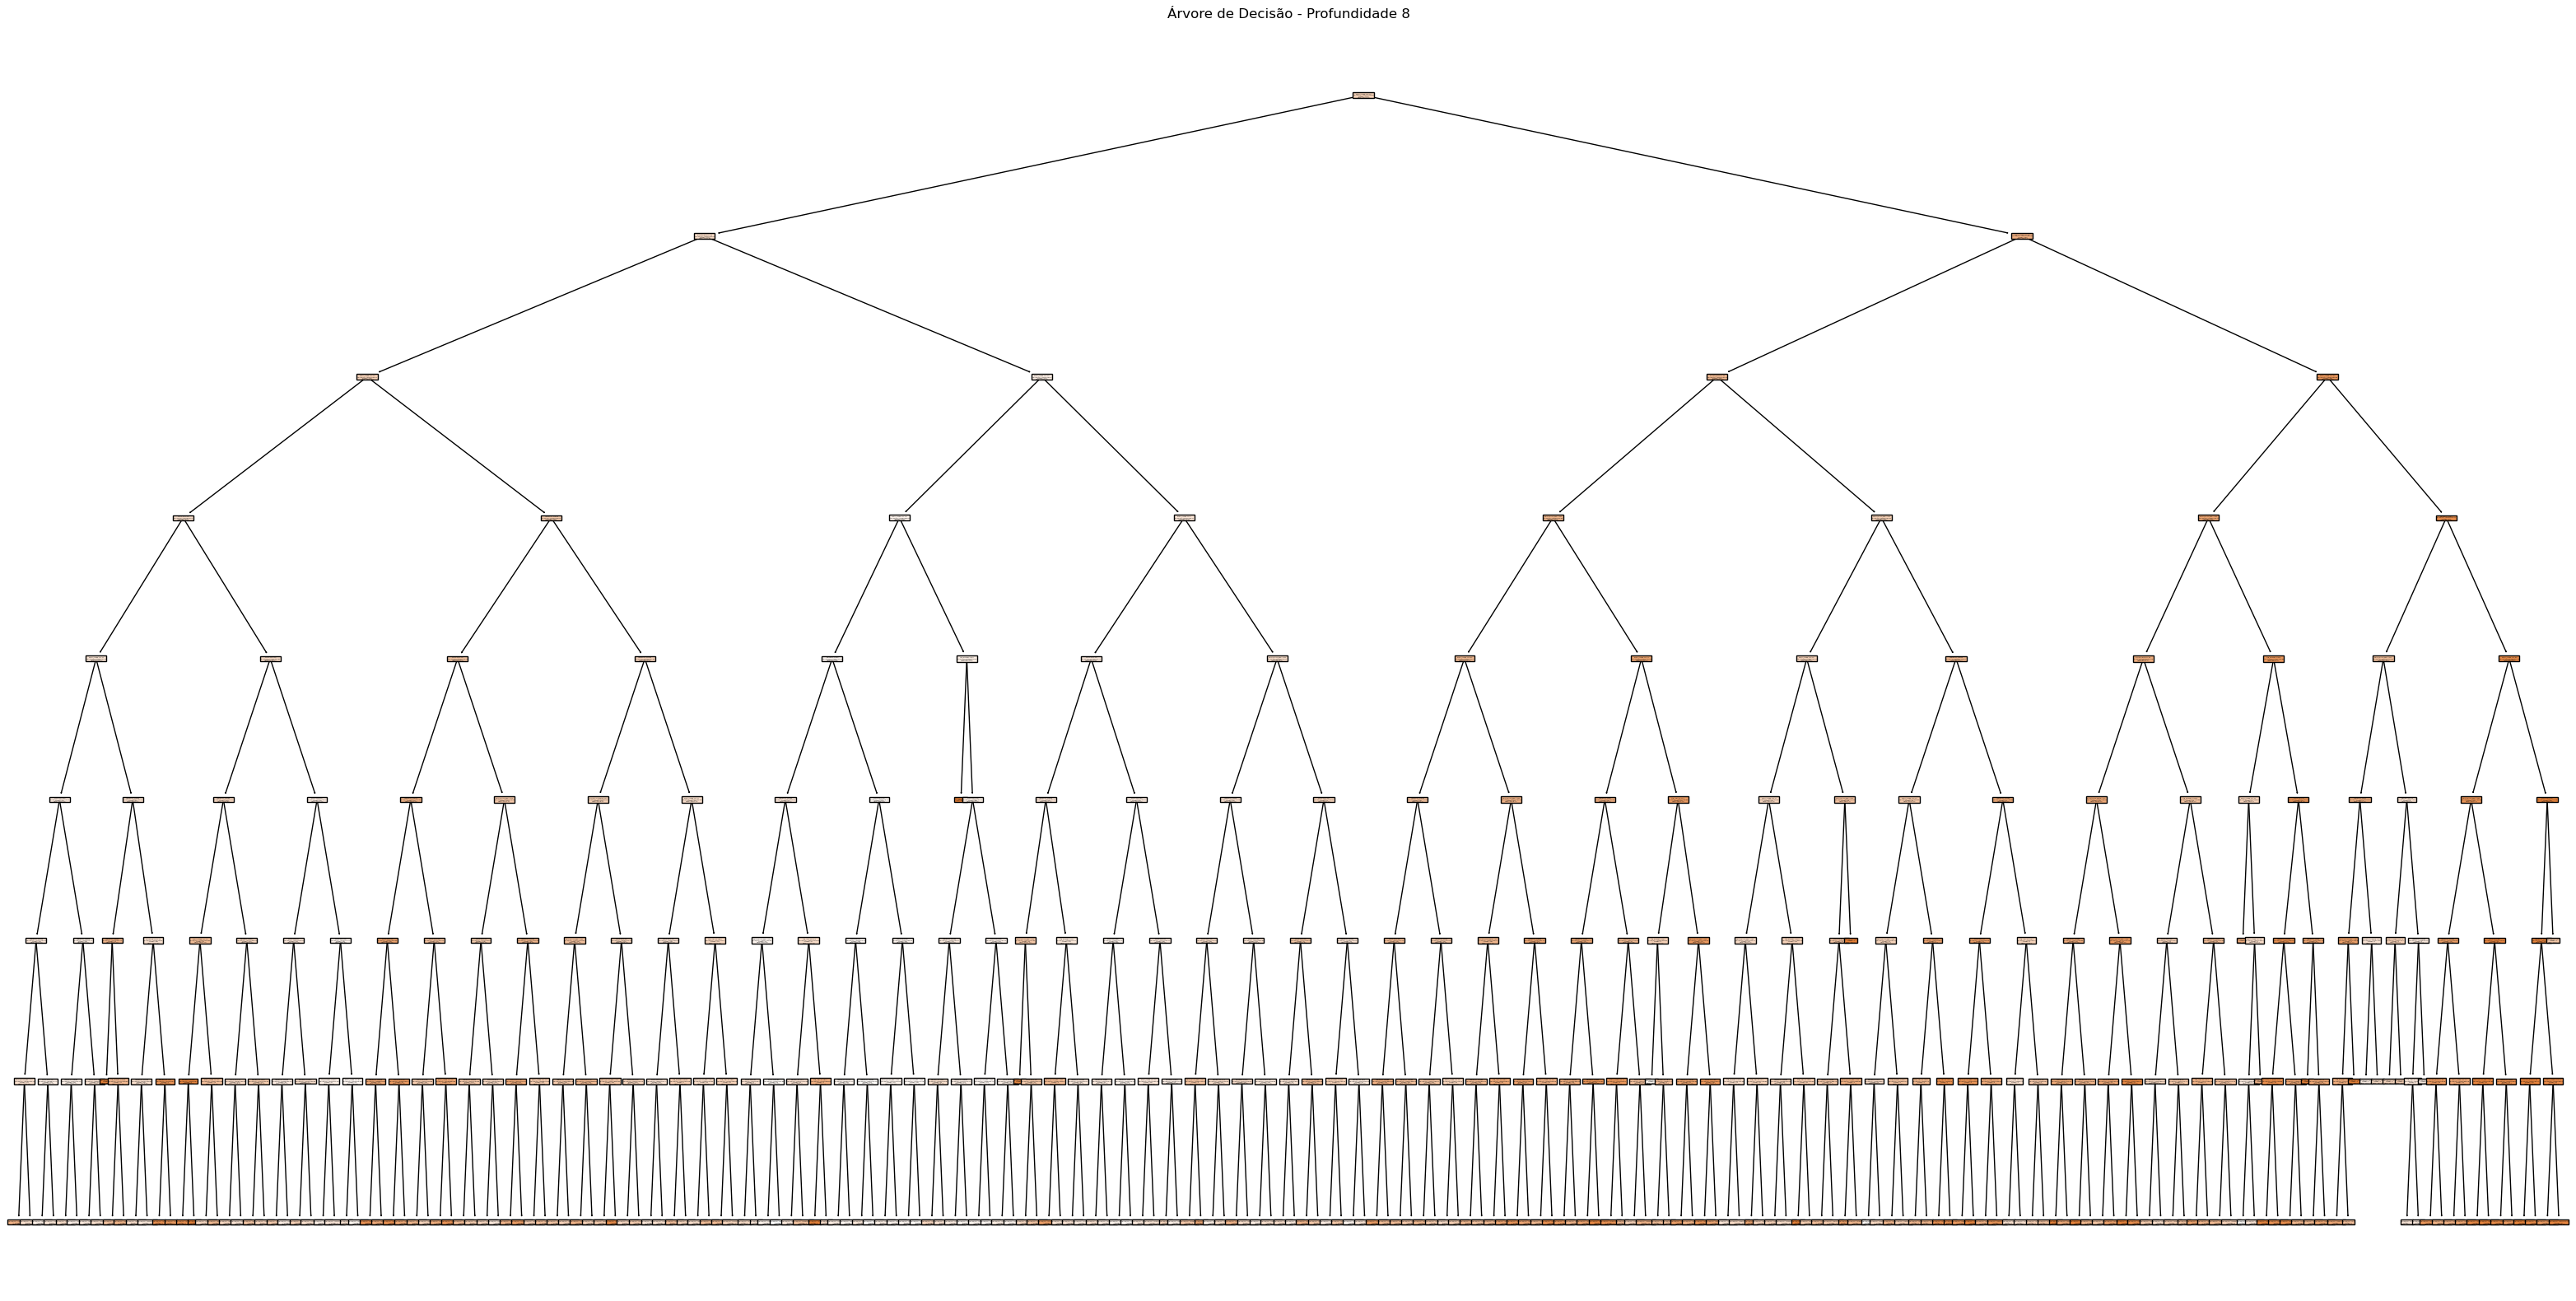

In [142]:
plt.figure(figsize=(40,20))
plot_tree(clf_oito, filled=True, feature_names=X_teste.columns, class_names=['Classe 0', 'Classe 1'])
plt.title("Árvore de Decisão - Profundidade 8")
plt.show()

Olhando para a arvore a variavel possivelmente mais importante parece ser a variavel 'median_income', pois aparece em diversas divisoes.